In [25]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import norm


def black_scholes_call(S, K, T, r, sigma):
    '''
    C	=	call option price
    N	=	CDF of the normal distribution
    S_t	=	spot price of an asset
    K	=	strike price
    r	=	risk-free interest rate
    T	=	time to maturity
    \sigma	=	volatility of the asset
    '''
    d1 = (np.log(S / K) + (r + 0.5 * sigma ** 2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)
    return S * norm.cdf(d1) - K * np.exp(-r * T) * norm.cdf(d2)


def black_scholes_put(S, K, T, r, sigma):
    '''
    C	=	call option price
    N	=	CDF of the normal distribution
    S_t	=	spot price of an asset
    K	=	strike price
    r	=	risk-free interest rate
    T	=	time to maturity
    \sigma	=	volatility of the asset
    '''
    d1 = (np.log(S / K) + (r + 0.5 * sigma ** 2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)
    return K * np.exp(-r * T) * norm.cdf(-d2) - S * norm.cdf(-d1)


def binomial_tree_option(S, K, T, r, sigma, steps, option_type='call'):
    '''
    C	=	call option price
    N	=	CDF of the normal distribution
    S_t	=	spot price of an asset
    K	=	strike price
    r	=	risk-free interest rate
    T	=	time to maturity
    \sigma	=	volatility of the asset
    '''
    dt = T / steps
    u = np.exp(sigma * np.sqrt(dt))
    d = 1 / u
    p = (np.exp(r * dt) - d) / (u - d)

    # Initialize asset prices at maturity
    asset_prices = np.zeros(steps + 1)
    option_values = np.zeros(steps + 1)

    for i in range(steps + 1):
        asset_prices[i] = S * (u ** (steps - i)) * (d ** i)
        if option_type == 'call':
            option_values[i] = max(0, asset_prices[i] - K)
        else:
            option_values[i] = max(0, K - asset_prices[i])

    # Step back through the tree
    for j in range(steps - 1, -1, -1):
        for i in range(j + 1):
            option_values[i] = np.exp(-r * dt) * (p * option_values[i] + (1 - p) * option_values[i + 1])

    return option_values[0]


def generate_heatmap(option_type='call'):
    S = np.linspace(50, 150, 20)  # Stock prices
    K = np.linspace(50, 150, 20)  # Strike prices
    T = 1  # 1 year until expiration
    r = 0.05  # Risk-free rate
    sigma = 0.2  # Volatility

    prices = np.zeros((len(S), len(K)))

    for i, s in enumerate(S):
        for j, k in enumerate(K):
            if option_type == 'call':
                prices[i, j] = black_scholes_call(s, k, T, r, sigma)
            else:
                prices[i, j] = black_scholes_put(s, k, T, r, sigma)

    return prices, S, K


def plot_heatmap(data, S, K, title):
    plt.figure(figsize=(10, 8))
    # sns.heatmap(data, cmap=cmap, cbar=True, xticklabels=10, yticklabels=10)
    # sns.heatmap(data, cmap='RdYlGn', cbar=True)

    sns.heatmap(data, cmap='RdYlGn', cbar=True, 
                xticklabels=np.round(K, 2), yticklabels=np.round(S, 2),
                annot=True, fmt=".2f",  # Show values in cells, formatted to 2 decimal places
                annot_kws={"size": 8})  # Size of the annotation text
    plt.title(title)
    plt.xlabel('Strike Price (K)')
    plt.ylabel('Stock Price (S)')
    plt.show()


In [23]:
# np.linspace(50, 150, 20)  # Stock prices

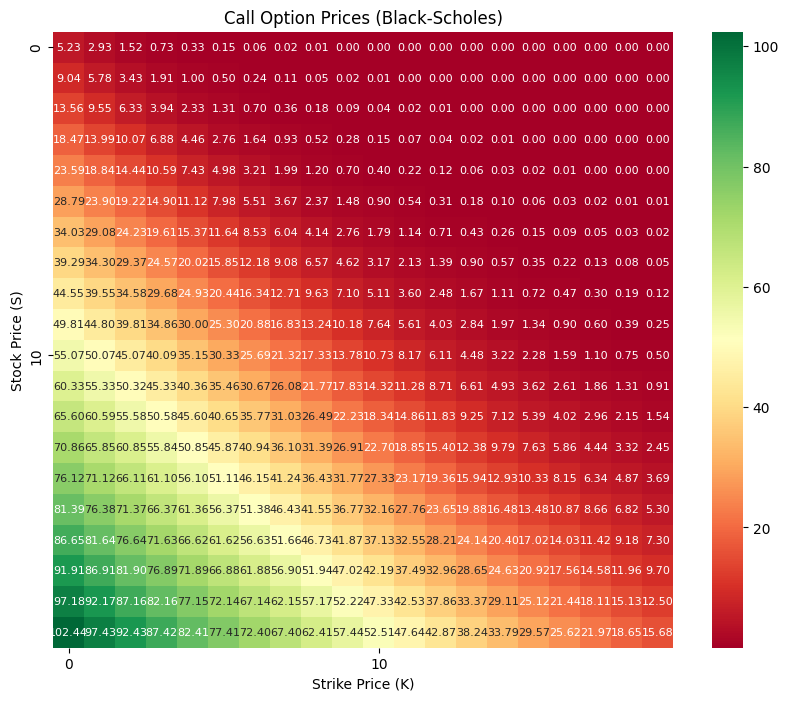

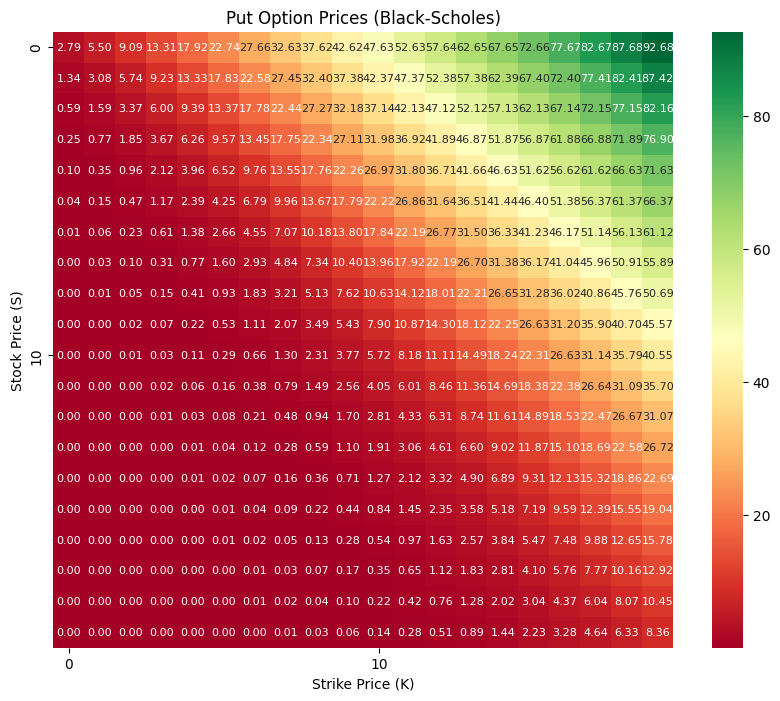

In [24]:
call_prices, S, K = generate_heatmap('call')
put_prices, S, K = generate_heatmap('put')
plot_heatmap(call_prices,S ,K , 'Call Option Prices (Black-Scholes)')
plot_heatmap(put_prices,S ,K, 'Put Option Prices (Black-Scholes)')